# Emerging Technologies Project
## Cathal Butler | G00346889
### References
* Ian McLoughlin lecture of the module and tutor for this project. Lecture content, labs and online video tutorials and 
  explanation
* https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/index.html?index=..%2F..index#0
* https://www.tensorflow.org/guide/data_performance
* https://codelabs.developers.google.com/codelabs/keras-flowers-data/#3
* https://keras.io/examples/mnist_cnn/
* https://www.ics.uci.edu/~mohamadt/keras_mnist.html
* https://machinelearningmastery.com/save-load-keras-deep-learning-models/
* https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc
* https://www.programcreek.com/python/example/89044/keras.utils.np_utils.to_categorical

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


# The number of training examples in one forward/backward pass. 
# The higher the batch size, the more memory space you'll need.
batch_size = 128
num_classes = 10
# Setting the number of forward passes and backward passes of all the training examples
epochs = 10
# input image dimensions : IMPORTANT
img_rows, img_cols = 28, 28

## Load Data set
The MINST dataset will be loaded from keras as it is available through the cloud.<br>
    `(x_train, y_train), (X_test, y_test) = mnist.load_data()`<br>
`x_train` contains 60k arrays of 28x28.<br>
`y_train` 10k arrays of 28x28, the y_train contains corresponding labels<br>
The test data `x_test` which is not as large as the train contains 10K arrays of 28x28<br>
Again `y_text` holding the corresponding labels.  

In [81]:
# Load data into a Numpy Array. The data, split between train and test sets
# The MINST dataset is loaded from keras:
# TRAIN & TEST 
(x_train, y_train), (X_test, y_test) = mnist.load_data()
# Print the original X & Y train shape:
print("Original X shape", x_train.shape)
print("Original Y shape", y_train.shape)

# Reshape data.
if K.image_data_format() == 'channels_first':
    # resizing the train data and storing it inside a NumPy Array:
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    # resizing the test data and storing it inside a NumPy Array:
    x_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    # Define the input shapes for the keras model of the images
    input_shape = (1, img_rows, img_cols)
else:
    # resizing the train data and storing it inside a NumPy Array:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    # resizing the test data and storing it inside a NumPy Array:
    x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    # Define the input shapes for the keras model of the images
    input_shape = (img_rows, img_cols, 1)

Original X shape (60000, 28, 28)
Original Y shape (60000,)
Training X matrix shape (60000, 28, 28, 1)
Testing X matrix shape (10000, 28, 28)
5
Training Y matrix shape (60000, 10)
Testing Y matrix shape (10000, 10)


### Normalize inputs from 0-255 to 0-1
It is common to use 32-bit when training a neural network, regarding the division by 255, this is the max value of a 
type(the inputs type before conversion to float32), so this will ensure that the inputs are scaled between<br>`0.0` & `1.0`.

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255 

# Print the training and testing X matrix shape
print("Training X matrix shape", x_train.shape)
print("Testing X matrix shape", X_test.shape)
print (y_train[0]) 

### Covert class vectors to binary class matrices
After doing the necessary processing on the image information, the label data i.e. y_train and y_test need to be
converted into categorical formats like label ‘3’ should be converted to a vector<br> `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`<br>
for model building.<br><br>
    `y_train = keras.utils.to_categorical(y_train, num_classes)`<br>
    `y_test = keras.utils.to_categorical(y_test, num_classes )`

In [ ]:
# Represent the targets as one-hot vectors: e.g. 2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0].
#set number of categories
nb_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes )
# Printing out the Y training and testing matrix shape
print("Training Y matrix shape", y_train.shape)
print("Testing Y matrix shape", y_test.shape)

## Example train data from the dataset

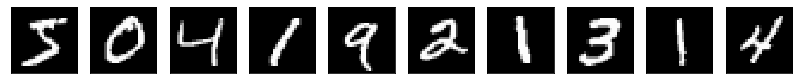

In [82]:
# Plot examples of the data.
plt.figure(1, figsize=(14,3))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    

## Keras Sequential Model
More information on Keras Sequential Models [here](https://keras.io/getting-started/sequential-model-guide/)
    
 * Convolution Layer (`Conv2D`):
     - This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
     - A 2D convolution layer means that the input of the convolution operation is three-dimensional. Lets go throw the
     parameters<br> 
      - `fliters=32` sets the number of filters used in the convolution operation.
      - `kernel_size=(3,3)` specifies the size of the convolution filter in pixels. This must be an odd integer.
      - `activation` the activation function you want to apply after preforming the convolution.
      - `input_shape` which is the order of data received from `channels_first` or `channels_last` above.
 * MaxPooling2D 
      - MaxPooling is to downscaling the dimensionality of the input image
      - Using MaxPooling in my model<br>
       - `pool_size=(2,2)` A tuple setting the size of the pooling window.  
 * Dropout
      - 
      
 * Flatten
      -   
 * Relu(Rectified Linear Unit):
            
     - Relu would typically be used for all layers but the last. For the last layer softmax activation could be used.
           
 * SoftMax:
     
      - Softmax is used on the last layer and has an set amount of classes. It should output 10 numbers 
      between 0 and 1 representing the probability of this digit being a 0, a 1, a 2 and so on.
          

In [83]:
# Keras Model
model = Sequential()
# Convolution Layer:
# Input images with 3 channels:
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(fliters=32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
# Unflattened data
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

## Keras Model Summary

In [84]:
# Keras Summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               1179904   
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)             

## Compile the Keras Model
Compile the model to build each layer. The loss function is one of the two parameters required to compile the model. 
The second parameter is the optimizer, it is the algorithm used to update the weights.

In [85]:
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## Train the model
Train the model and save the history. This will be used to plot the loss trajectory graph below. 

In [86]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Save the scores
score = model.evaluate(x_test, y_test, verbose=0)
# Display the test loss and test accuracy:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 43s 721us/step - loss: 0.2496 - accuracy: 0.9223 - val_loss: 0.0546 - val_accuracy: 0.9819
Epoch 2/10
60000/60000 [==============================] - 48s 797us/step - loss: 0.0800 - accuracy: 0.9758 - val_loss: 0.0364 - val_accuracy: 0.9876
Epoch 3/10
60000/60000 [==============================] - 37s 622us/step - loss: 0.0588 - accuracy: 0.9822 - val_loss: 0.0304 - val_accuracy: 0.9890
Epoch 4/10
60000/60000 [==============================] - 35s 576us/step - loss: 0.0478 - accuracy: 0.9849 - val_loss: 0.0264 - val_accuracy: 0.9915
Epoch 5/10
60000/60000 [==============================] - 32s 532us/step - loss: 0.0402 - accuracy: 0.9874 - val_loss: 0.0305 - val_accuracy: 0.9888
Epoch 6/10
60000/60000 [==============================] - 32s 533us/step - loss: 0.0361 - accuracy: 0.9890 - val_loss: 0.0264 - val_accuracy: 0.9906
Epoch 7/10
60000/60000 [==============================] 

## Graph loss trajectory throughout training

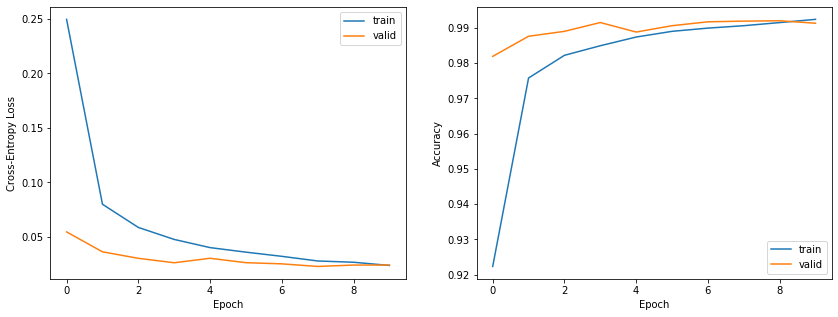

In [87]:
# Plot loss trajectory throughout training.
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## Performance Evaluation

In [88]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test cross-entropy loss: %0.5f' % score[0])
print('Test accuracy: %.2f%%' % (score[1]*100))

Test cross-entropy loss: 0.02427
Test accuracy: 99.13%


## Save model Weights and Architecture Together
Saving the model this way includes everything about the model 
* Model weights
* Model architecture
* Model compilation details, the loss and metrics
* Model optimizer

In [89]:
# Save the model in h5 format 
model.save("model.h5")    
print("Saved model to disk")

Saved model to disk
